In [ ]:
#Gaussian Distribution Model Project
#Done By: Layth Al-Nemri

In [ ]:
!pip install wget

In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard (2).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
creditcard = pd.read_csv('creditcard.csv')
print('Number of rows =', creditcard.shape[0])
#creditcard
print('Last column =', creditcard.columns[-1])
print('Last column index =', creditcard.columns.get_loc(creditcard.columns[-1]))
print('Class values =', set(creditcard['Class'].values))
creditcard.head()

Number of rows = 284807
Last column = Class
Last column index = 30
Class values = {0, 1}


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?

Class 0 percentage = 99.827%

Class 1 percentage = 0.173%
* Is this data considered balanced or unbalanced? Why is this the case?

The data is unbalanced, the number of entries that have class 0 is much more than the entries that have class 1
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?

Balanced data gives sufficient information for each class to enable the classifier to make accurate decisions. If the KNN classifier had unbalanced data, the point it needs to classify will most likely be compared to data point from the majority class giving an inacurate decision. (aka resulting in a biased decision, which is a big problem since we are mostly interested in the minority data).
* What metrics should we use to evaluate a model in such cases

we should use precision and recall to evalute the model (or F1 score for a more general evaluation) since accuaracy will not give an accurate evaluation.


In [ ]:
#creditcard.loc[30,'Class']
class0 = 0
class1 = 0
rows_number = creditcard.shape[0]
#for i in range(rows_number):
#  if creditcard.loc[i,'Class'] == 0:
#    class0 +=1
#  else: class1 +=1
class1 = creditcard['Class'].sum()
print('Class 0 percentage =', ((rows_number - class1)/rows_number)*100, '%')
print('Class 1 percentage =', (class1/rows_number)*100, '%')



Class 0 percentage = 99.82725143693798 %
Class 1 percentage = 0.1727485630620034 %


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X_Data = creditcard.drop(columns=['Class'])
y_Target = creditcard['Class']
X_val_test, y_val_test = 0,0
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X_train, X_val_test, y_train, y_val_test = train_test_split(X_Data, y_Target, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=0)


Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


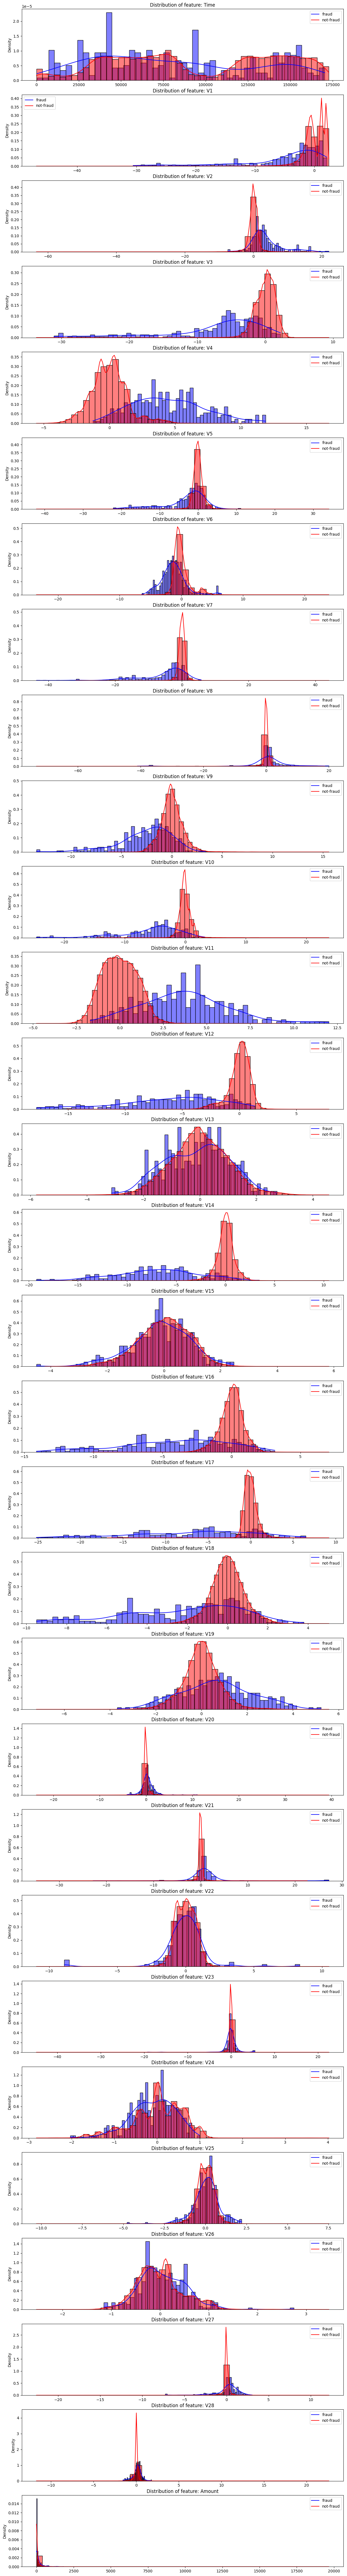

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in creditcard.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model.

Anomalies are the points that deviate alot from the gaussian distribution. Data usually follows the normal distribution, it is safe to assume that anomalies would be the frauds. These graphs shows the data points that deviates alot from the normal distribution set by the legitimate transactions, this way you can easily detect them.

## **Part 2: Single feature model with one Gaussian distribution:
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of
  2. Compute AUC (Area under the ROC Curve) based on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set.
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score.
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.

  Answer: after sorting val_scores using np.sort (which has O(nlogn)), we go through them as they would be our thrashold suggestions using a binary tree (which has O(logn)), and for each threshold we use f1_score (which has O(n)).
  So the Big O notation to determine the optimal threshold would be O(nlogn).

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table.
 4. Are these results different or similar? Why?

 Answer: They are the same. Even if we removed the fraud transaction from our training dataset, the rest of the data is still normally distibuted, and the gaussian distribution will still give the fraud transaction as anomalies since they have different feature values (gaussian distibution method detect fraud transaction by pointing out anomalies not by training on the fraud values). also, for f1 score we are using the same threshold as well.





In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
X_train_V = X_train.drop(columns=['Time','Amount'])
X_val_V = X_val.drop(columns=['Time','Amount'])
X_test_V = X_test.drop(columns=['Time','Amount'])
highAUC_1 , highAUC_2 , highAUC_3 = 0 , 0 , 0
feature1 , feature2 , feature3 = ' ' , ' ' , ' '
AUC_values = pd.DataFrame(columns=['train AUC','val AUC'])

for i in X_train_V.columns:
  X_train_SF = pd.DataFrame(X_train_V[i])
  X_val_SF = pd.DataFrame(X_val_V[i])
  gm = GaussianMixture(n_components = 1, random_state=0, )
  gm.fit(X_train_SF)
  train_score = gm.score_samples(X_train_SF)
  val_score = gm.score_samples(X_val_SF)
  train_auc = roc_auc_score(y_train, -1*train_score)
  val_auc = roc_auc_score(y_val, -1*val_score)
#  print('feature', i, 'train AUC=', train_auc, ', val AUC=', val_auc)
#  new_row = pd.DataFrame({'train AUC':train_auc, 'val AUC':val_auc})
  new_row = pd.DataFrame({'train AUC':[train_auc], 'val AUC':[val_auc]}).rename(index={0:i})
#  new_row = new_row.rename(index={0:i})
  AUC_values = pd.concat([AUC_values, new_row])
#  AUC_values = AUC_values.append({'train AUC':train_auc, 'val AUC':val_auc},ignore_index = True)
#  new_index = (AUC_values.shape[0])-1
#  AUC_values.rename(index={new_index: i})
#  AUC_values.rename(index={(AUC_values.shape[0]-1): i})
#  print(val_auc)
  if val_auc.astype(float) > highAUC_1 :
    highAUC_3 = highAUC_2
    feature3 = feature2
    highAUC_2 = highAUC_1
    feature2 = feature1
    highAUC_1 = val_auc
    feature1 = i
#    print('1-',highAUC_1,i)
  elif val_auc.astype(float) > highAUC_2 :
    highAUC_3 = highAUC_2
    feature3 = feature2
    highAUC_2 = val_auc
    feature2 = i
#    print('2-',highAUC_2,i)
  elif val_auc.astype(float) > highAUC_3 :
    highAUC_3 = val_auc
    feature3 = i
#    print('3-',highAUC_3,i)
print('1st best feature =', feature1)
print('2nd best feature =', feature2)
print('3rd best feature =', feature3)
AUC_values

1st best feature = V14
2nd best feature = V10
3rd best feature = V4


,train AUC,val AUC
V1,0.705102,0.694811
V2,0.837499,0.837800
V3,0.876537,0.838364
V4,0.892103,0.888283
V5,0.771825,0.786857
V6,0.734380,0.673559
V7,0.862967,0.867423
V8,0.773238,0.774130
V9,0.802874,0.776739
V10,0.913600,0.905959


In [ ]:
from sklearn.metrics import f1_score
Best_features = [feature1,feature2,feature3]
best_threshold = pd.DataFrame(columns=['Best threshold','maximum f1'])
for j in Best_features:
  X_train_SF = pd.DataFrame(X_train_V[j])
  X_val_SF = pd.DataFrame(X_val_V[j])
  gm = GaussianMixture(n_components = 1, random_state=0, )
  gm.fit(X_train_SF)
  val_score = gm.score_samples(X_val_SF)

#  tr_list = np.random.uniform(val_score.min(),val_score.max(),100)
  tr_list = np.sort(val_score)
  ub = np.size(tr_list)-1
  ub_old = np.size(tr_list)-1
  lb = 0
  lb_old = 0
  best_f1 = 0
  best_tr = 0
  while lb < ub:
    tr_index = (ub - lb)//2
    tr = tr_list[tr_index]
    f1 = f1_score(y_val, val_score<=tr)
#    print(f1,j)
    if f1 > best_f1:
      best_tr = tr
      best_f1 = f1
#      print(best_tr,best_f1,j)
    if f1 == 1:
      break
    elif f1 > 0.5:
      lb = tr_index+1
    else: ub = tr_index-1
    if ub_old == ub and lb_old == lb:
      break
    else:
      ub_old = ub
      lb_old = lb
  new_threshold = pd.DataFrame({'Best threshold':[best_tr], 'maximum f1':[best_f1]}).rename(index={0:j})
  best_threshold = pd.concat([best_threshold, new_threshold])
best_threshold


,Best threshold,maximum f1
V14,-19.698973,0.590164
V10,-57.925869,0.252874
V4,-10.782374,0.351852


Answer: after sorting val_scores using np.sort (which has O(nlogn)), we go through them as they would be our thrashold suggestions using a binary tree (which has O(logn)), and for each threshold we use f1_score (which has O(n)).
  So the Big O notation to determine the optimal threshold would be O(nlogn).

In [ ]:
f1_AUC_values = pd.DataFrame(columns=['AUC value','f1 score'])
for k in Best_features:
  X_train_SF = pd.DataFrame(X_train_V[k])
  X_train_SF_SV = X_train_SF[y_train == 0]
  X_val_SF = pd.DataFrame(X_val_V[k])
  gm = GaussianMixture(n_components = 1, random_state=0, )
  gm.fit(X_train_SF)
  val_score = gm.score_samples(X_val_SF)
  val_auc = roc_auc_score(y_val, -1*val_score)
  if val_auc > AUC_values.loc[k,'val AUC']:
    print(k, 'val AUC new >', 'val AUC old')
  elif val_auc  < AUC_values.loc[k,'val AUC']:
    print(k, 'val AUC new <', 'val AUC old')
  else : print(k, 'val AUC new =', 'val AUC old')
  tr = best_threshold.loc[k,'Best threshold']
  f1 = f1_score(y_val, val_score<=tr)
  if f1 > best_threshold.loc[k,'maximum f1']:
    print(k, 'f1 new >', 'f1 old')
  elif f1  < best_threshold.loc[k,'maximum f1']:
    print(k, 'f1 new <', 'f1 old')
  else : print(k, 'f1 new =', 'f1 old')
  new_value = pd.DataFrame({'AUC value':[val_auc], 'f1 score':[f1]}).rename(index={0:k})
  f1_AUC_values = pd.concat([f1_AUC_values, new_value])
f1_AUC_values



V14 val AUC new = val AUC old
V14 f1 new = f1 old
V10 val AUC new = val AUC old
V10 f1 new = f1 old
V4 val AUC new = val AUC old
V4 f1 new = f1 old


,AUC value,f1 score
V14,0.938073,0.590164
V10,0.905959,0.252874
V4,0.888283,0.351852


 Answer: They are the same. Even if we removed the fraud transaction from our training dataset, the rest of the data is still normally distibuted, and the gaussian distribution will still give the fraud transaction as anomalies since they have different feature values (gaussian distibution method detect fraud transaction by pointing out anomalies not by training on the fraud values). also, for f1 score we are using the same threshold as well.

## **Part 3: Multiple feature model with one Gaussian distribution:
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6.
 8. For each pair, find a threshold to maximize your validation set F1 Score.
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial)





Pair 1

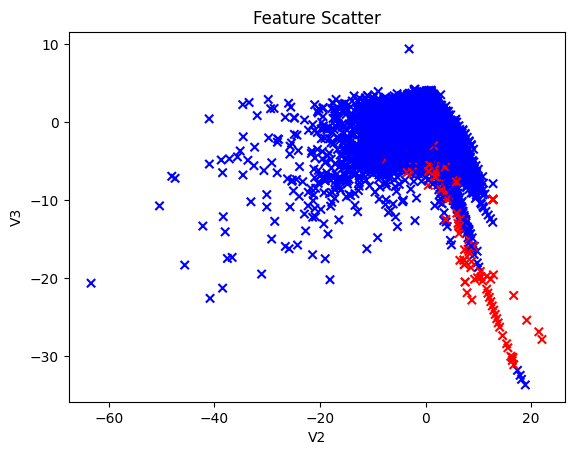

In [ ]:
picked_features = ['V2','V3','V4','V10','V7','V14','V16','V17']
data_colors = {0:'blue',1:'red'}
X_train_V1 = pd.DataFrame(X_train_V[picked_features[0]])
X_train_V2 = pd.DataFrame(X_train_V[picked_features[1]])
plt.scatter(X_train_V1,X_train_V2,c=y_train.map(data_colors),marker="x")
plt.xlabel(picked_features[0])
plt.ylabel(picked_features[1])
plt.title('Feature Scatter')
plt.show()

Will be fitting on 2 gaussian components, the blue dots form 2 clusters, one really compact and the other is spread a bit.

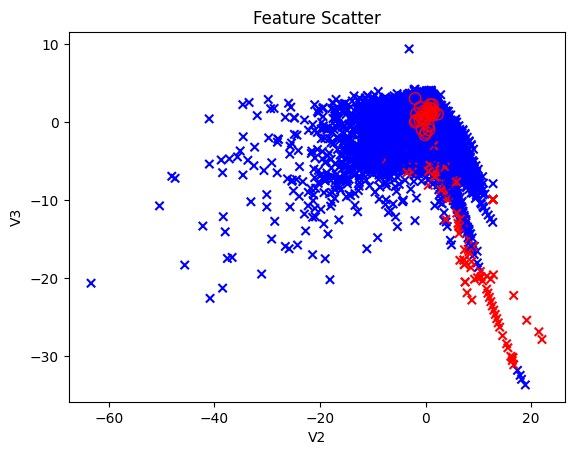

,train AUC value,val AUC value,f1 score,best threshold
pair 1,0.892252,0.86568,0.222222,-15.316573


In [ ]:
Pairs_f1_AUC_values = pd.DataFrame(columns=['train AUC value','val AUC value','f1 score','best threshold'])
pair_1_train = X_train_V1.join(X_train_V2)
X_val_V1 = pd.DataFrame(X_val_V[picked_features[0]])
X_val_V2 = pd.DataFrame(X_val_V[picked_features[1]])
pair_1_val = X_val_V1.join(X_val_V2)
gm1 = GaussianMixture(n_components = 2, random_state=0, )
gm1.fit(pair_1_train)
train_score_1 = gm1.score_samples(pair_1_train)
val_score_1 = gm1.score_samples(pair_1_val)
train_auc_1 = roc_auc_score(y_train, -1*train_score_1)
val_auc_1 = roc_auc_score(y_val, -1*val_score_1)

tr_list = np.sort(val_score_1)
ub = np.size(tr_list)-1
ub_old = np.size(tr_list)-1
lb = 0
lb_old = 0
best_f1 = 0
best_tr = 0
while lb < ub:
  tr_index = (ub - lb)//2
  tr = tr_list[tr_index]
  f1 = f1_score(y_val, val_score_1<=tr)
  if f1 > best_f1:
    best_tr = tr
    best_f1 = f1
  if f1 == 1:
    break
  elif f1 > 0.5:
    lb = tr_index+1
  else: ub = tr_index-1
  if ub_old == ub and lb_old == lb:
    break
  else:
    ub_old = ub
    lb_old = lb
new_value = pd.DataFrame({'train AUC value':[train_auc_1], 'val AUC value':[val_auc_1], 'f1 score':[best_f1], 'best threshold':[best_tr]}).rename(index={0:'pair 1'})
Pairs_f1_AUC_values = pd.concat([Pairs_f1_AUC_values, new_value])

plt.scatter(X_train_V1,X_train_V2,marker="x",c=y_train.map(data_colors))
#outliers = np.nonzero(val_score_1<=best_tr)[0]
#outliers = pd.Series(val_score_1[val_score_1<=best_tr])
outliers = pd.Series(val_score_1<=best_tr)
outliers = outliers.reindex(X_train_V1.index, fill_value=0)
outliers = outliers[outliers == 1]
plt.scatter(X_train_V1.loc[outliers.index],X_train_V2.loc[outliers.index],marker="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel(picked_features[0])
plt.ylabel(picked_features[1])
plt.title('Feature Scatter')
plt.show()
Pairs_f1_AUC_values

Pair 2

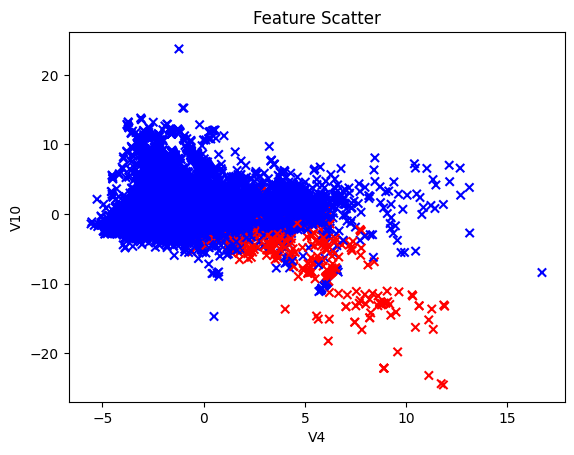

In [ ]:
X_train_V3 = pd.DataFrame(X_train_V[picked_features[2]])
X_train_V4 = pd.DataFrame(X_train_V[picked_features[3]])
plt.scatter(X_train_V3,X_train_V4,c=y_train.map(data_colors),marker="x")
plt.xlabel(picked_features[2])
plt.ylabel(picked_features[3])
plt.title('Feature Scatter')
plt.show()

Will be fitting on 4 gaussian components, the blue dots form a reverse T shape, 4 clusters would cover it.

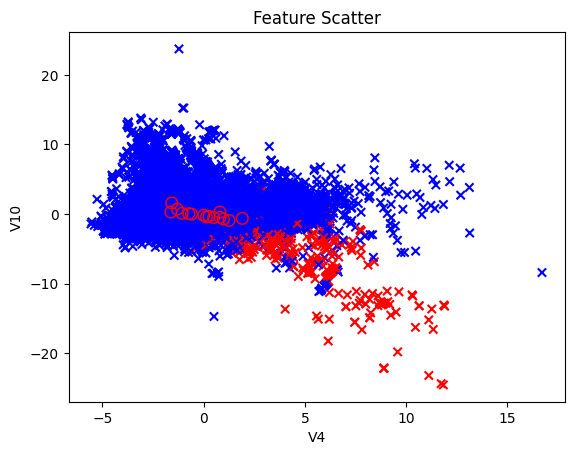

,train AUC value,val AUC value,f1 score,best threshold
pair 1,0.892252,0.865680,0.222222,-15.316573
pair 2,0.953825,0.949042,0.275862,-12.338982


In [ ]:
pair_2_train = X_train_V3.join(X_train_V4)
X_val_V3 = pd.DataFrame(X_val_V[picked_features[2]])
X_val_V4 = pd.DataFrame(X_val_V[picked_features[3]])
pair_2_val = X_val_V3.join(X_val_V4)
gm2 = GaussianMixture(n_components = 4, random_state=0, )
gm2.fit(pair_2_train)
train_score_2 = gm2.score_samples(pair_2_train)
val_score_2 = gm2.score_samples(pair_2_val)
train_auc_2 = roc_auc_score(y_train, -1*train_score_2)
val_auc_2 = roc_auc_score(y_val, -1*val_score_2)

tr_list = np.sort(val_score_2)
ub = np.size(tr_list)-1
ub_old = np.size(tr_list)-1
lb = 0
lb_old = 0
best_f1 = 0
best_tr = 0
while lb < ub:
  tr_index = (ub - lb)//2
  tr = tr_list[tr_index]
  f1 = f1_score(y_val, val_score_2<=tr)
  if f1 > best_f1:
    best_tr = tr
    best_f1 = f1
  if f1 == 1:
    break
  elif f1 > 0.5:
    lb = tr_index+1
  else: ub = tr_index-1
  if ub_old == ub and lb_old == lb:
    break
  else:
    ub_old = ub
    lb_old = lb
new_value = pd.DataFrame({'train AUC value':[train_auc_2], 'val AUC value':[val_auc_2], 'f1 score':[best_f1], 'best threshold':[best_tr]}).rename(index={0:'pair 2'})
Pairs_f1_AUC_values = pd.concat([Pairs_f1_AUC_values, new_value])

plt.scatter(X_train_V3,X_train_V4,marker="x",c=y_train.map(data_colors))
outliers = pd.Series(val_score_2<=best_tr)
outliers = outliers.reindex(X_train_V3.index, fill_value=0)
outliers = outliers[outliers == 1]
plt.scatter(X_train_V3.loc[outliers.index],X_train_V4.loc[outliers.index],marker="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel(picked_features[2])
plt.ylabel(picked_features[3])
plt.title('Feature Scatter')
plt.show()
Pairs_f1_AUC_values

Pair 3

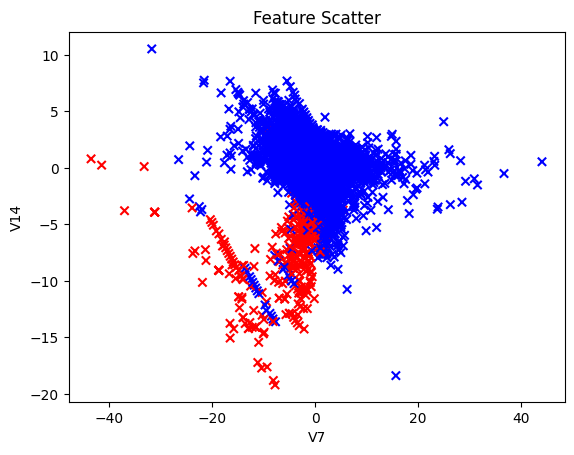

In [ ]:
X_train_V5 = pd.DataFrame(X_train_V[picked_features[4]])
X_train_V6 = pd.DataFrame(X_train_V[picked_features[5]])
plt.scatter(X_train_V5,X_train_V6,c=y_train.map(data_colors),marker="x")
plt.xlabel(picked_features[4])
plt.ylabel(picked_features[5])
plt.title('Feature Scatter')
plt.show()

Will be fitting on 1 gaussian components, the blue dots form 1 non-uniform cluster.

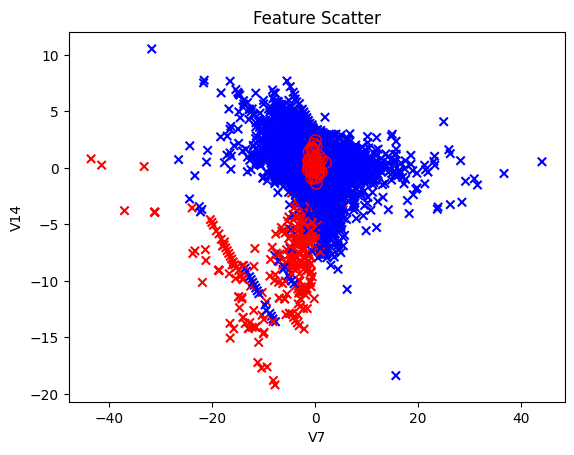

,train AUC value,val AUC value,f1 score,best threshold
pair 1,0.892252,0.865680,0.222222,-15.316573
pair 2,0.953825,0.949042,0.275862,-12.338982
pair 3,0.960494,0.963563,0.373333,-37.317968


In [ ]:
pair_3_train = X_train_V5.join(X_train_V6)
X_val_V5 = pd.DataFrame(X_val_V[picked_features[4]])
X_val_V6 = pd.DataFrame(X_val_V[picked_features[5]])
pair_3_val = X_val_V5.join(X_val_V6)
gm3 = GaussianMixture(n_components = 1, random_state=0, )
gm3.fit(pair_3_train)
train_score_3 = gm3.score_samples(pair_3_train)
val_score_3 = gm3.score_samples(pair_3_val)
train_auc_3 = roc_auc_score(y_train, -1*train_score_3)
val_auc_3 = roc_auc_score(y_val, -1*val_score_3)

tr_list = np.sort(val_score_3)
ub = np.size(tr_list)-1
ub_old = np.size(tr_list)-1
lb = 0
lb_old = 0
best_f1 = 0
best_tr = 0
while lb < ub:
  tr_index = (ub - lb)//2
  tr = tr_list[tr_index]
  f1 = f1_score(y_val, val_score_3<=tr)
  if f1 > best_f1:
    best_tr = tr
    best_f1 = f1
  if f1 == 1:
    break
  elif f1 > 0.5:
    lb = tr_index+1
  else: ub = tr_index-1
  if ub_old == ub and lb_old == lb:
    break
  else:
    ub_old = ub
    lb_old = lb
new_value = pd.DataFrame({'train AUC value':[train_auc_3], 'val AUC value':[val_auc_3], 'f1 score':[best_f1], 'best threshold':[best_tr]}).rename(index={0:'pair 3'})
Pairs_f1_AUC_values = pd.concat([Pairs_f1_AUC_values, new_value])

plt.scatter(X_train_V5,X_train_V6,marker="x",c=y_train.map(data_colors))
outliers = pd.Series(val_score_3<=best_tr)
outliers = outliers.reindex(X_train_V5.index, fill_value=0)
outliers = outliers[outliers == 1]
plt.scatter(X_train_V5.loc[outliers.index],X_train_V6.loc[outliers.index],marker="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel(picked_features[4])
plt.ylabel(picked_features[5])
plt.title('Feature Scatter')
plt.show()
Pairs_f1_AUC_values

Pair 4

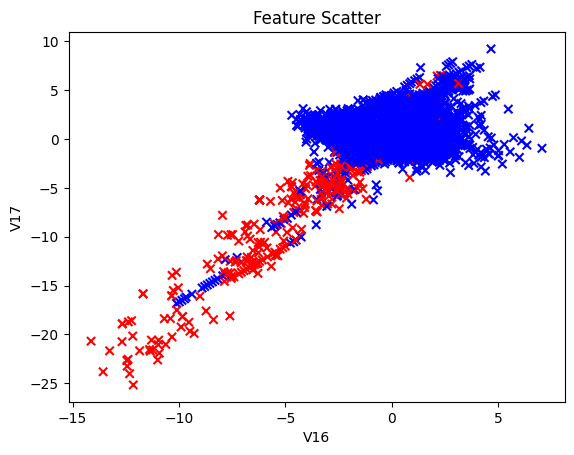

In [ ]:
X_train_V7 = pd.DataFrame(X_train_V[picked_features[6]])
X_train_V8 = pd.DataFrame(X_train_V[picked_features[7]])
plt.scatter(X_train_V7,X_train_V8,c=y_train.map(data_colors),marker="x")
plt.xlabel(picked_features[6])
plt.ylabel(picked_features[7])
plt.title('Feature Scatter')
plt.show()

Will be fitting on 1 gaussian components, the blue dots form 1 non-uniform cluster.

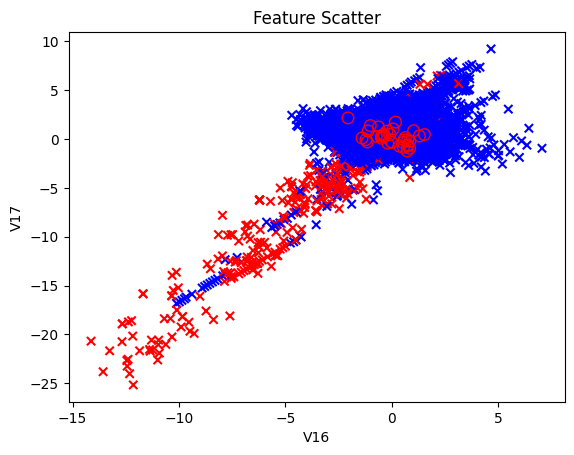

,train AUC value,val AUC value,f1 score,best threshold
pair 1,0.892252,0.865680,0.222222,-15.316573
pair 2,0.953825,0.949042,0.275862,-12.338982
pair 3,0.960494,0.963563,0.373333,-37.317968
pair 4,0.944997,0.905702,0.588235,-9.880976


In [ ]:
pair_4_train = X_train_V7.join(X_train_V8)
X_val_V7 = pd.DataFrame(X_val_V[picked_features[6]])
X_val_V8 = pd.DataFrame(X_val_V[picked_features[7]])
pair_4_val = X_val_V7.join(X_val_V8)
gm4 = GaussianMixture(n_components = 2, random_state=0, )
gm4.fit(pair_4_train)
train_score_4 = gm4.score_samples(pair_4_train)
val_score_4 = gm4.score_samples(pair_4_val)
train_auc_4 = roc_auc_score(y_train, -1*train_score_4)
val_auc_4 = roc_auc_score(y_val, -1*val_score_4)

tr_list = np.sort(val_score_4)
ub = np.size(tr_list)-1
ub_old = np.size(tr_list)-1
lb = 0
lb_old = 0
best_f1 = 0
best_tr = 0
while lb < ub:
  tr_index = (ub - lb)//2
  tr = tr_list[tr_index]
  f1 = f1_score(y_val, val_score_4<=tr)
  if f1 > best_f1:
    best_tr = tr
    best_f1 = f1
  if f1 == 1:
    break
  elif f1 > 0.5:
    lb = tr_index+1
  else: ub = tr_index-1
  if ub_old == ub and lb_old == lb:
    break
  else:
    ub_old = ub
    lb_old = lb
new_value = pd.DataFrame({'train AUC value':[train_auc_4], 'val AUC value':[val_auc_4], 'f1 score':[best_f1], 'best threshold':[best_tr]}).rename(index={0:'pair 4'})
Pairs_f1_AUC_values = pd.concat([Pairs_f1_AUC_values, new_value])

plt.scatter(X_train_V7,X_train_V8,marker="x",c=y_train.map(data_colors))
outliers = pd.Series(val_score_4<=best_tr)
outliers = outliers.reindex(X_train_V7.index, fill_value=0)
outliers = outliers[outliers == 1]
plt.scatter(X_train_V7.loc[outliers.index],X_train_V8.loc[outliers.index],marker="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel(picked_features[6])
plt.ylabel(picked_features[7])
plt.title('Feature Scatter')
plt.show()
Pairs_f1_AUC_values

## **Part 4: Single feature model with two Gaussian distributions.
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively.
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed.
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c?

  Answer:

  Best feature is V17 with best f1 = 0.6545 and best c = 7.2

In [ ]:
selected_feature = 'V14'
X_train_SF_4 = pd.DataFrame(X_train_V[selected_feature])
X_val_SF_4 = pd.DataFrame(X_val_V[selected_feature])
X_train_SF_4_SV_1 = X_train_SF_4[y_train == 0]
gm_4_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_4_1.fit(X_train_SF_4_SV_1)
X_train_SF_4_SV_2 = X_train_SF_4[y_train == 1]
gm_4_2 = GaussianMixture(n_components = 1, random_state=0, )
gm_4_2.fit(X_train_SF_4_SV_2)
train_score_4_1 = gm_4_1.score_samples(X_train_SF_4)
val_score_4_1 = gm_4_1.score_samples(X_val_SF_4)
train_score_4_2 = gm_4_2.score_samples(X_train_SF_4)
val_score_4_2 = gm_4_2.score_samples(X_val_SF_4)
c=0
best_f1 = 0
best_c = 0
while c < 10:
  f1 = f1_score(y_val, (val_score_4_1 < (c * val_score_4_2)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
print('Best f1 =',best_f1, 'Best c =', best_c)

Best f1 = 0.6371681415929203 Best c = 9.299999999999983


In [ ]:
Best_c_f1_values = pd.DataFrame(columns=['Best c','Best f1'])
Best_f1_total = 0
Best_feature_total =' '
Best_c_total = 0
for selected_feature in X_train_V.columns:
  X_train_SF_4 = pd.DataFrame(X_train_V[selected_feature])
  X_val_SF_4 = pd.DataFrame(X_val_V[selected_feature])
  X_train_SF_4_SV_1 = X_train_SF_4[y_train == 0]
  gm_4_1 = GaussianMixture(n_components = 1, random_state=0, )
  gm_4_1.fit(X_train_SF_4_SV_1)
  X_train_SF_4_SV_2 = X_train_SF_4[y_train == 1]
  gm_4_2 = GaussianMixture(n_components = 1, random_state=0, )
  gm_4_2.fit(X_train_SF_4_SV_2)
  train_score_4_1 = gm_4_1.score_samples(X_train_SF_4)
  val_score_4_1 = gm_4_1.score_samples(X_val_SF_4)
  train_score_4_2 = gm_4_2.score_samples(X_train_SF_4)
  val_score_4_2 = gm_4_2.score_samples(X_val_SF_4)
  c=0
  best_f1 = 0
  best_c = 0
  while c < 10:
    f1 = f1_score(y_val, (val_score_4_1 < (c * val_score_4_2)))
    if f1 > best_f1:
      best_c = c
      best_f1 = f1
    c = c+0.1
  new_value = pd.DataFrame({'Best c':[best_c], 'Best f1':[best_f1]}).rename(index={0:selected_feature})
  Best_c_f1_values = pd.concat([Best_c_f1_values, new_value])
  if best_f1 > Best_f1_total :
    Best_f1_total = best_f1
    Best_c_total = best_c
    Best_feature_total = selected_feature
print('Best feature is', Best_feature_total , 'with best f1 =', Best_f1_total, 'and best c =', Best_c_total)
Best_c_f1_values

Best feature is V17 with best f1 = 0.6545454545454547 and best c = 7.19999999999999


,Best c,Best f1
V1,5.0,0.097087
V2,3.7,0.111111
V3,9.9,0.273684
V4,4.5,0.363636
V5,5.0,0.146067
V6,1.9,0.106870
V7,7.8,0.207792
V8,4.9,0.038710
V9,3.3,0.365591
V10,8.6,0.340909


## **Part 5: Multivariate and Mixture of Gaussians Distribution
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots.

Answer:

Best model was model no. 3, which is a multivariate and mixture of gaussians.

Tied with model 8, but model 3 has a higher validation AUC

It used 6 features ('V4','V10','V11','V14','V16','V17')

It used 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

f1 score = 0.8125, c = 3.8

Find below table that summarise the findings.

Why does it make sense to have multiple components for fraud transactions?

Answer:

fraud transaction can have multiple patterns into each direction. giving them multiple components helps detecting those random patterns in multiple directions.

In [ ]:
Models_data = pd.DataFrame(columns=['no. of Features','no. of Gaussians','no. of Components','val f1 score','train f1 score','val AUC','train AUC','Model Description'])

model_no = 'model 1'
no_features = 28
no_gaussians = 1
no_component = 0
model_description = 'All features, using a threshold after selecting the best tr, going through 10 values of components, trained on fraud and non fraud'

best_f1 = 0
for n in range(10):
  n += 1
  gm_m1 = GaussianMixture(n_components = n, random_state=0, )
  gm_m1.fit(X_train_V)
  train_m1_score = gm_m1.score_samples(X_train_V)
  val_m1_score = gm_m1.score_samples(X_val_V)
  train_auc_m1 = roc_auc_score(y_train,train_m1_score)
  val_auc_m1 = roc_auc_score(y_val,val_m1_score)

  tr_list = np.sort(val_m1_score)
  ub = np.size(tr_list)-1
  ub_old = np.size(tr_list)-1
  lb = 0
  lb_old = 0
  best_f1 = 0
  best_tr = 0
  while lb < ub:
    tr_index = (ub - lb)//2
    tr = tr_list[tr_index]
    f1 = f1_score(y_val, val_m1_score<=tr)
    if f1 > best_f1:
      best_tr = tr
      best_f1 = f1
      no_component = n
    if f1 == 1:
      break
    elif f1 > 0.5:
      lb = tr_index+1
    else: ub = tr_index-1
    if ub_old == ub and lb_old == lb:
      break
    else:
      ub_old = ub
      lb_old = lb
best_t_f1 = f1_score(y_train, train_m1_score<=best_tr)
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m1],'train AUC':[train_auc_m1],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best tr' , best_tr)

best tr -87.84576464608091


In [ ]:
model_no = 'model 2'
no_features = 28
no_gaussians = 2
no_component = 10
model_description = 'All features, 2 gaussians , using the previous number of component for fraud, and 1 component for non fraud'

best_f1 = 0
X_train_m2_1 = X_train_V[y_train == 0]
gm_m2_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m2_1.fit(X_train_m2_1)
X_train_m2_2 = X_train_V[y_train == 1]
gm_m2_2 = GaussianMixture(n_components = 10, random_state=0, )
gm_m2_2.fit(X_train_m2_2)

train_m2_1_score = gm_m2_1.score_samples(X_train_V)
val_m2_1_score = gm_m2_1.score_samples(X_val_V)
train_m2_2_score = gm_m2_2.score_samples(X_train_V)
val_m2_2_score = gm_m2_2.score_samples(X_val_V)

train_auc_m2_1 = roc_auc_score(y_train,train_m2_1_score)
val_auc_m2_1 = roc_auc_score(y_val,val_m2_1_score)
train_auc_m2_2 = roc_auc_score(y_train,train_m2_2_score)
val_auc_m2_2 = roc_auc_score(y_val,val_m2_2_score)

if train_auc_m2_1 > train_auc_m2_2:
  train_auc_m2 = train_auc_m2_1
else: train_auc_m2 = train_auc_m2_2
if val_auc_m2_1 > val_auc_m2_2:
  val_auc_m2 = val_auc_m2_1
else: val_auc_m2 = val_auc_m2_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m2_1_score < (c * val_m2_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m2_1_score < (best_c * train_m2_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m2],'train AUC':[train_auc_m2],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.600000000000002


In [ ]:
model_no = 'model 3'
no_features = 6
no_gaussians = 2
no_component = 5
model_description = 'Best 6 features from part 2, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V10','V11','V14','V16','V17']
X_train_m3 = pd.DataFrame(X_train_V['V4'])
X_val_m3 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m3_a = pd.DataFrame(X_train_V[BF])
  X_train_m3 = X_train_m3.join(X_train_m3_a)
  X_val_m3_a = pd.DataFrame(X_val_V[BF])
  X_val_m3 = X_val_m3.join(X_val_m3_a)

X_train_m3_1 = X_train_m3[y_train == 0]
gm_m3_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m3_1.fit(X_train_m3_1)
X_train_m3_2 = X_train_m3[y_train == 1]
gm_m3_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m3_2.fit(X_train_m3_2)

train_m3_1_score = gm_m3_1.score_samples(X_train_m3)
val_m3_1_score = gm_m3_1.score_samples(X_val_m3)
train_m3_2_score = gm_m3_2.score_samples(X_train_m3)
val_m3_2_score = gm_m3_2.score_samples(X_val_m3)

train_auc_m3_1 = roc_auc_score(y_train,train_m3_1_score)
val_auc_m3_1 = roc_auc_score(y_val,val_m3_1_score)
train_auc_m3_2 = roc_auc_score(y_train,train_m3_2_score)
val_auc_m3_2 = roc_auc_score(y_val,val_m3_2_score)

if train_auc_m3_1 > train_auc_m3_2:
  train_auc_m3 = train_auc_m3_1
else: train_auc_m3 = train_auc_m3_2
if val_auc_m3_1 > val_auc_m3_2:
  val_auc_m3 = val_auc_m3_1
else: val_auc_m3 = val_auc_m3_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m3_1_score < (c * val_m3_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m3_1_score < (best_c * train_m3_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m3],'train AUC':[train_auc_m3],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.800000000000002


In [ ]:
model_no = 'model 4'
no_features = 3
no_gaussians = 2
no_component = 5
model_description = 'Best 3 features from part 2, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V10','V14']
X_train_m4 = pd.DataFrame(X_train_V['V4'])
X_val_m4 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m4_a = pd.DataFrame(X_train_V[BF])
  X_train_m4 = X_train_m4.join(X_train_m4_a)
  X_val_m4_a = pd.DataFrame(X_val_V[BF])
  X_val_m4 = X_val_m4.join(X_val_m4_a)

X_train_m4_1 = X_train_m4[y_train == 0]
gm_m4_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m4_1.fit(X_train_m4_1)
X_train_m4_2 = X_train_m4[y_train == 1]
gm_m4_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m4_2.fit(X_train_m4_2)

train_m4_1_score = gm_m4_1.score_samples(X_train_m4)
val_m4_1_score = gm_m4_1.score_samples(X_val_m4)
train_m4_2_score = gm_m4_2.score_samples(X_train_m4)
val_m4_2_score = gm_m4_2.score_samples(X_val_m4)

train_auc_m4_1 = roc_auc_score(y_train,train_m4_1_score)
val_auc_m4_1 = roc_auc_score(y_val,val_m4_1_score)
train_auc_m4_2 = roc_auc_score(y_train,train_m4_2_score)
val_auc_m4_2 = roc_auc_score(y_val,val_m4_2_score)

if train_auc_m4_1 > train_auc_m4_2:
  train_auc_m4 = train_auc_m4_1
else: train_auc_m4 = train_auc_m4_2
if val_auc_m4_1 > val_auc_m4_2:
  val_auc_m4 = val_auc_m4_1
else: val_auc_m4 = val_auc_m4_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m4_1_score < (c * val_m4_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m4_1_score < (best_c * train_m4_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m4],'train AUC':[train_auc_m4],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 2.9000000000000012


In [ ]:
model_no = 'model 5'
no_features = 14
no_gaussians = 2
no_component = 5
model_description = 'Using the best half from part 2, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V3','V4','V5','V7','V8','V10','V11','V12','V14','V16','V17','V18','V28']
X_train_m5 = pd.DataFrame(X_train_V['V2'])
X_val_m5 = pd.DataFrame(X_val_V['V2'])
for BF in Best_features:
  X_train_m5_a = pd.DataFrame(X_train_V[BF])
  X_train_m5 = X_train_m5.join(X_train_m5_a)
  X_val_m5_a = pd.DataFrame(X_val_V[BF])
  X_val_m5 = X_val_m5.join(X_val_m5_a)

X_train_m5_1 = X_train_m5[y_train == 0]
gm_m5_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m5_1.fit(X_train_m5_1)
X_train_m5_2 = X_train_m5[y_train == 1]
gm_m5_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m5_2.fit(X_train_m5_2)

train_m5_1_score = gm_m5_1.score_samples(X_train_m5)
val_m5_1_score = gm_m5_1.score_samples(X_val_m5)
train_m5_2_score = gm_m5_2.score_samples(X_train_m5)
val_m5_2_score = gm_m5_2.score_samples(X_val_m5)

train_auc_m5_1 = roc_auc_score(y_train,train_m5_1_score)
val_auc_m5_1 = roc_auc_score(y_val,val_m5_1_score)
train_auc_m5_2 = roc_auc_score(y_train,train_m5_2_score)
val_auc_m5_2 = roc_auc_score(y_val,val_m5_2_score)

if train_auc_m5_1 > train_auc_m5_2:
  train_auc_m5 = train_auc_m5_1
else: train_auc_m5 = train_auc_m5_2
if val_auc_m5_1 > val_auc_m5_2:
  val_auc_m5 = val_auc_m5_1
else: val_auc_m5 = val_auc_m5_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m5_1_score < (c * val_m5_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m5_1_score < (best_c * train_m5_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m5],'train AUC':[train_auc_m5],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.600000000000002


In [ ]:
model_no = 'model 6'
no_features = 6
no_gaussians = 1
no_component = 0
model_description = 'Best 6 features from part 2, using a threshold after selecting the best tr, going through 10 values of components, trained on fraud and non fraud'

best_f1 = 0
Best_features = ['V10','V11','V14','V16','V17']
X_train_m6 = pd.DataFrame(X_train_V['V4'])
X_val_m6 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m6_a = pd.DataFrame(X_train_V[BF])
  X_train_m6 = X_train_m6.join(X_train_m6_a)
  X_val_m6_a = pd.DataFrame(X_val_V[BF])
  X_val_m6 = X_val_m6.join(X_val_m6_a)

for n in range(10):
  n += 1
  gm_m6 = GaussianMixture(n_components = n, random_state=0, )
  gm_m6.fit(X_train_m6)
  train_m6_score = gm_m6.score_samples(X_train_m6)
  val_m6_score = gm_m6.score_samples(X_val_m6)
  train_auc_m6 = roc_auc_score(y_train,train_m6_score)
  val_auc_m6 = roc_auc_score(y_val,val_m6_score)

  tr_list = np.sort(val_m6_score)
  ub = np.size(tr_list)-1
  ub_old = np.size(tr_list)-1
  lb = 0
  lb_old = 0
  best_f1 = 0
  best_tr = 0
  while lb < ub:
    tr_index = (ub - lb)//2
    tr = tr_list[tr_index]
    f1 = f1_score(y_val, val_m6_score<=tr)
    if f1 > best_f1:
      best_tr = tr
      best_f1 = f1
      no_component = n
    if f1 == 1:
      break
    elif f1 > 0.5:
      lb = tr_index+1
    else: ub = tr_index-1
    if ub_old == ub and lb_old == lb:
      break
    else:
      ub_old = ub
      lb_old = lb
best_t_f1 = f1_score(y_train, train_m6_score<=best_tr)
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m6],'train AUC':[train_auc_m6],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best tr' , best_tr)

best tr -18.609353480725158


In [ ]:
model_no = 'model 7'
no_features = 3
no_gaussians = 1
no_component = 0
model_description = 'Best 3 features from part 2, using a threshold after selecting the best tr, going through 10 values of components, trained on fraud and non fraud'

best_f1 = 0
Best_features = ['V10','V14']
X_train_m7 = pd.DataFrame(X_train_V['V4'])
X_val_m7 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m7_a = pd.DataFrame(X_train_V[BF])
  X_train_m7 = X_train_m7.join(X_train_m7_a)
  X_val_m7_a = pd.DataFrame(X_val_V[BF])
  X_val_m7 = X_val_m7.join(X_val_m7_a)

for n in range(10):
  n += 1
  gm_m7 = GaussianMixture(n_components = n, random_state=0, )
  gm_m7.fit(X_train_m7)
  train_m7_score = gm_m7.score_samples(X_train_m7)
  val_m7_score = gm_m7.score_samples(X_val_m7)
  train_auc_m7 = roc_auc_score(y_train,train_m7_score)
  val_auc_m7 = roc_auc_score(y_val,val_m7_score)

  tr_list = np.sort(val_m7_score)
  ub = np.size(tr_list)-1
  ub_old = np.size(tr_list)-1
  lb = 0
  lb_old = 0
  best_f1 = 0
  best_tr = 0
  while lb < ub:
    tr_index = (ub - lb)//2
    tr = tr_list[tr_index]
    f1 = f1_score(y_val, val_m7_score<=tr)
    if f1 > best_f1:
      best_tr = tr
      best_f1 = f1
      no_component = n
    if f1 == 1:
      break
    elif f1 > 0.5:
      lb = tr_index+1
    else: ub = tr_index-1
    if ub_old == ub and lb_old == lb:
      break
    else:
      ub_old = ub
      lb_old = lb
best_t_f1 = f1_score(y_train, train_m7_score<=best_tr)
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m7],'train AUC':[train_auc_m7],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best tr' , best_tr)

best tr -12.375126631704402


In [ ]:
model_no = 'model 8'
no_features = 7
no_gaussians = 2
no_component = 5
model_description = 'Best 7 features from part 2, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V7','V10','V11','V14','V16','V17']
X_train_m8 = pd.DataFrame(X_train_V['V4'])
X_val_m8 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m8_a = pd.DataFrame(X_train_V[BF])
  X_train_m8 = X_train_m8.join(X_train_m8_a)
  X_val_m8_a = pd.DataFrame(X_val_V[BF])
  X_val_m8 = X_val_m8.join(X_val_m8_a)

X_train_m8_1 = X_train_m8[y_train == 0]
gm_m8_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m8_1.fit(X_train_m8_1)
X_train_m8_2 = X_train_m8[y_train == 1]
gm_m8_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m8_2.fit(X_train_m8_2)

train_m8_1_score = gm_m8_1.score_samples(X_train_m8)
val_m8_1_score = gm_m8_1.score_samples(X_val_m8)
train_m8_2_score = gm_m8_2.score_samples(X_train_m8)
val_m8_2_score = gm_m8_2.score_samples(X_val_m8)

train_auc_m8_1 = roc_auc_score(y_train,train_m8_1_score)
val_auc_m8_1 = roc_auc_score(y_val,val_m8_1_score)
train_auc_m8_2 = roc_auc_score(y_train,train_m8_2_score)
val_auc_m8_2 = roc_auc_score(y_val,val_m8_2_score)

if train_auc_m8_1 > train_auc_m8_2:
  train_auc_m8 = train_auc_m8_1
else: train_auc_m8 = train_auc_m8_2
if val_auc_m8_1 > val_auc_m8_2:
  val_auc_m8 = val_auc_m8_1
else: val_auc_m8 = val_auc_m8_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m8_1_score < (c * val_m8_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m8_1_score < (best_c * train_m8_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m8],'train AUC':[train_auc_m8],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.600000000000002


In [ ]:
model_no = 'model 9'
no_features = 5
no_gaussians = 2
no_component = 5
model_description = 'Best 5 features from part 2, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V10','V11','V14','V16']
X_train_m9 = pd.DataFrame(X_train_V['V4'])
X_val_m9 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m9_a = pd.DataFrame(X_train_V[BF])
  X_train_m9 = X_train_m9.join(X_train_m9_a)
  X_val_m9_a = pd.DataFrame(X_val_V[BF])
  X_val_m9 = X_val_m9.join(X_val_m9_a)

X_train_m9_1 = X_train_m9[y_train == 0]
gm_m9_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m9_1.fit(X_train_m9_1)
X_train_m9_2 = X_train_m9[y_train == 1]
gm_m9_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m9_2.fit(X_train_m9_2)

train_m9_1_score = gm_m9_1.score_samples(X_train_m9)
val_m9_1_score = gm_m9_1.score_samples(X_val_m9)
train_m9_2_score = gm_m9_2.score_samples(X_train_m9)
val_m9_2_score = gm_m9_2.score_samples(X_val_m9)

train_auc_m9_1 = roc_auc_score(y_train,train_m9_1_score)
val_auc_m9_1 = roc_auc_score(y_val,val_m9_1_score)
train_auc_m9_2 = roc_auc_score(y_train,train_m9_2_score)
val_auc_m9_2 = roc_auc_score(y_val,val_m9_2_score)

if train_auc_m9_1 > train_auc_m9_2:
  train_auc_m9 = train_auc_m9_1
else: train_auc_m9 = train_auc_m9_2
if val_auc_m9_1 > val_auc_m9_2:
  val_auc_m9 = val_auc_m9_1
else: val_auc_m9 = val_auc_m9_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m9_1_score < (c * val_m9_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m9_1_score < (best_c * train_m9_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m9],'train AUC':[train_auc_m9],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.0000000000000013


In [ ]:
model_no = 'model 10'
no_features = 3
no_gaussians = 2
no_component = 5
model_description = 'Best 3 features from part 4, 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

best_f1 = 0
Best_features = ['V11','V16','V17']
X_train_m10 = pd.DataFrame(X_train_V['V9'])
X_val_m10 = pd.DataFrame(X_val_V['V9'])
for BF in Best_features:
  X_train_m10_a = pd.DataFrame(X_train_V[BF])
  X_train_m10 = X_train_m10.join(X_train_m10_a)
  X_val_m10_a = pd.DataFrame(X_val_V[BF])
  X_val_m10 = X_val_m10.join(X_val_m10_a)

X_train_m10_1 = X_train_m10[y_train == 0]
gm_m10_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m10_1.fit(X_train_m10_1)
X_train_m10_2 = X_train_m10[y_train == 1]
gm_m10_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m10_2.fit(X_train_m10_2)

train_m10_1_score = gm_m10_1.score_samples(X_train_m10)
val_m10_1_score = gm_m10_1.score_samples(X_val_m10)
train_m10_2_score = gm_m10_2.score_samples(X_train_m10)
val_m10_2_score = gm_m10_2.score_samples(X_val_m10)

train_auc_m10_1 = roc_auc_score(y_train,train_m10_1_score)
val_auc_m10_1 = roc_auc_score(y_val,val_m10_1_score)
train_auc_m10_2 = roc_auc_score(y_train,train_m10_2_score)
val_auc_m10_2 = roc_auc_score(y_val,val_m10_2_score)

if train_auc_m10_1 > train_auc_m10_2:
  train_auc_m10 = train_auc_m10_1
else: train_auc_m10 = train_auc_m10_2
if val_auc_m10_1 > val_auc_m10_2:
  val_auc_m10 = val_auc_m10_1
else: val_auc_m10 = val_auc_m10_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m10_1_score < (c * val_m10_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m10_1_score < (best_c * train_m10_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m10],'train AUC':[train_auc_m10],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 3.900000000000002


In [ ]:
model_no = 'model 11'
no_features = 7
no_gaussians = 2
no_component = 3.8
model_description = 'Same as model 8 but with different number of components'

best_f1 = 0
Best_features = ['V7','V10','V11','V14','V16','V17']
X_train_m11 = pd.DataFrame(X_train_V['V4'])
X_val_m11 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m11_a = pd.DataFrame(X_train_V[BF])
  X_train_m11 = X_train_m11.join(X_train_m11_a)
  X_val_m11_a = pd.DataFrame(X_val_V[BF])
  X_val_m11 = X_val_m11.join(X_val_m11_a)

X_train_m11_1 = X_train_m11[y_train == 0]
gm_m11_1 = GaussianMixture(n_components = 3, random_state=0, )
gm_m11_1.fit(X_train_m11_1)
X_train_m11_2 = X_train_m11[y_train == 1]
gm_m11_2 = GaussianMixture(n_components = 8, random_state=0, )
gm_m11_2.fit(X_train_m11_2)

train_m11_1_score = gm_m11_1.score_samples(X_train_m11)
val_m11_1_score = gm_m11_1.score_samples(X_val_m11)
train_m11_2_score = gm_m11_2.score_samples(X_train_m11)
val_m11_2_score = gm_m11_2.score_samples(X_val_m11)

train_auc_m11_1 = roc_auc_score(y_train,train_m11_1_score)
val_auc_m11_1 = roc_auc_score(y_val,val_m11_1_score)
train_auc_m11_2 = roc_auc_score(y_train,train_m11_2_score)
val_auc_m11_2 = roc_auc_score(y_val,val_m11_2_score)

if train_auc_m11_1 > train_auc_m11_2:
  train_auc_m11 = train_auc_m11_1
else: train_auc_m11 = train_auc_m11_2
if val_auc_m11_1 > val_auc_m11_2:
  val_auc_m11 = val_auc_m11_1
else: val_auc_m11 = val_auc_m11_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m11_1_score < (c * val_m11_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m11_1_score < (best_c * train_m11_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m11],'train AUC':[train_auc_m11],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)

best c 1.8000000000000005


In [ ]:
model_no = 'model 12'
no_features = 10
no_gaussians = 2
no_component = 5
model_description = '10 features based on plot observation in part 1, 2 gaussians , using 1 component for fraud, and 5 component for non fraud'

best_f1 = 0
Best_features = ['V5','V8','V10','V11','V12','V13','V15','V17','V18']
X_train_m12 = pd.DataFrame(X_train_V['V4'])
X_val_m12 = pd.DataFrame(X_val_V['V4'])
for BF in Best_features:
  X_train_m12_a = pd.DataFrame(X_train_V[BF])
  X_train_m12 = X_train_m12.join(X_train_m12_a)
  X_val_m12_a = pd.DataFrame(X_val_V[BF])
  X_val_m12 = X_val_m12.join(X_val_m12_a)

X_train_m12_1 = X_train_m12[y_train == 0]
gm_m12_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_m12_1.fit(X_train_m12_1)
X_train_m12_2 = X_train_m12[y_train == 1]
gm_m12_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_m12_2.fit(X_train_m12_2)

train_m12_1_score = gm_m12_1.score_samples(X_train_m12)
val_m12_1_score = gm_m12_1.score_samples(X_val_m12)
train_m12_2_score = gm_m12_2.score_samples(X_train_m12)
val_m12_2_score = gm_m12_2.score_samples(X_val_m12)

train_auc_m12_1 = roc_auc_score(y_train,train_m12_1_score)
val_auc_m12_1 = roc_auc_score(y_val,val_m12_1_score)
train_auc_m12_2 = roc_auc_score(y_train,train_m12_2_score)
val_auc_m12_2 = roc_auc_score(y_val,val_m12_2_score)

if train_auc_m12_1 > train_auc_m12_2:
  train_auc_m12 = train_auc_m12_1
else: train_auc_m12 = train_auc_m12_2
if val_auc_m12_1 > val_auc_m12_2:
  val_auc_m12 = val_auc_m12_1
else: val_auc_m12 = val_auc_m12_2

best_c = 0
c = 0
while c < 10:
  f1 = f1_score(y_val, (val_m12_1_score < (c * val_m12_2_score)))
  if f1 > best_f1:
    best_c = c
    best_f1 = f1
  c = c+0.1
best_t_f1 = f1_score(y_train, (train_m12_1_score < (best_c * train_m12_2_score)))
new_model_data = pd.DataFrame({'no. of Features':[no_features],'no. of Gaussians':[no_gaussians],'no. of Components':[no_component],'val f1 score':[best_f1],'train f1 score':[best_t_f1],'val AUC':[val_auc_m12],'train AUC':[train_auc_m12],'Model Description':[model_description]}).rename(index={0:model_no})
Models_data = pd.concat([Models_data, new_model_data])
print ('best c' , best_c)
Models_data

best c 3.900000000000002


,no. of Features,no. of Gaussians,no. of Components,val f1 score,train f1 score,val AUC,train AUC,Model Description
model 1,28,1,10,0.351852,0.311688,0.100207,0.072857,"All features, using a threshold after selectin..."
model 2,28,2,10,0.800000,0.806676,0.568659,0.843964,"All features, 2 gaussians , using the previous..."
model 3,6,2,5,0.812500,0.789474,0.415586,0.495045,"Best 6 features from part 2, 2 gaussians , usi..."
model 4,3,2,5,0.800000,0.776699,0.580437,0.595047,"Best 3 features from part 2, 2 gaussians , usi..."
model 5,14,2,5,0.787402,0.776860,0.508661,0.670354,"Using the best half from part 2, 2 gaussians ,..."
model 6,6,1,10,0.240343,0.258929,0.038620,0.038615,"Best 6 features from part 2, using a threshold..."
model 7,3,1,10,0.403433,0.457976,0.036909,0.034755,"Best 3 features from part 2, using a threshold..."
model 8,7,2,5,0.812500,0.789986,0.394641,0.497678,"Best 7 features from part 2, 2 gaussians , usi..."
model 9,5,2,5,0.809524,0.800558,0.499583,0.552410,"Best 5 features from part 2, 2 gaussians , usi..."
model 10,3,2,5,0.733333,0.708148,0.421406,0.474294,"Best 3 features from part 4, 2 gaussians , usi..."


## **Part 6: Evaluating performance on test set:
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set.

Best model was model no. 3, which is a multivariate and mixture of gaussians.

Tied with model 8, but model 3 has a higher validation AUC

It used 6 features ('V4','V10','V11','V14','V16','V17')

It used 2 gaussians , using 5 component for fraud, and 1 component for non fraud'

val f1 score = 0.8125, c = 3.8

Test set f1 score = 0.8095238095238095

Test set precision score = 0.7727272727272727

Test set recall score = 0.85


In [ ]:
from sklearn.metrics import precision_score, recall_score
Best_features = ['V10','V11','V14','V16','V17']
X_train_mf = pd.DataFrame(X_train_V['V4'])
X_test_mf = pd.DataFrame(X_test_V['V4'])
for BF in Best_features:
  X_train_mf_a = pd.DataFrame(X_train_V[BF])
  X_train_mf = X_train_mf.join(X_train_mf_a)
  X_test_mf_a = pd.DataFrame(X_test_V[BF])
  X_test_mf = X_test_mf.join(X_test_mf_a)

X_train_mf_1 = X_train_mf[y_train == 0]
gm_mf_1 = GaussianMixture(n_components = 1, random_state=0, )
gm_mf_1.fit(X_train_mf_1)
X_train_mf_2 = X_train_mf[y_train == 1]
gm_mf_2 = GaussianMixture(n_components = 5, random_state=0, )
gm_mf_2.fit(X_train_mf_2)

train_mf_1_score = gm_mf_1.score_samples(X_train_mf)
test_mf_1_score = gm_mf_1.score_samples(X_test_mf)
train_mf_2_score = gm_mf_2.score_samples(X_train_mf)
test_mf_2_score = gm_mf_2.score_samples(X_test_mf)

f1f = f1_score(y_test, (test_mf_1_score < (3.8 * test_mf_2_score)))
pr = precision_score(y_test, (test_mf_1_score < (3.8 * test_mf_2_score)))
rc = recall_score(y_test, (test_mf_1_score < (3.8 * test_mf_2_score)))

print ('Test set f1 score =' , f1f)
print ('Test set precision score =' , pr)
print ('Test set recall score =' , rc)

Test set f1 score = 0.8095238095238095
Test set precision score = 0.7727272727272727
Test set recall score = 0.85


## **Part 7: Is Gaussian the only useful distribution?

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.

Answer:

No, the gaussian distribution is not the only useful distribution, there are many others. we pick the suitible distribution based on the nature of our data, each has its own strength and uses, like:

Bernoulli Distribution: distribute a 0/1 outcomes (like our case here), it is considered the simplest discrete distribution function which makes it quit popular.

Poisson Distribution: usually used for rare events, use the number of events occuring per time or space interval.

Exponential Distributiion: usually used to model time in tervals of the poisson distribution.

Log-Normal Distribution: used to plot variables that are a product of multiple random variables.
_________________________________________________________________________
References:

https://mathworld.wolfram.com/BernoulliDistribution.html

https://www.investopedia.com/terms/l/log-normal-distribution.asp

ChatGPT
Prompt: popular distributions other than the gaussian distribution

Answer: There are several popular probability distributions used in statistics and various fields of study other than the Gaussian (normal) distribution. Here are a few of them:

1. **Binomial Distribution**: This distribution is used when there are two possible outcomes for each trial. For example, it can model the number of successes in a fixed number of independent Bernoulli trials.

2. **Poisson Distribution**: This distribution is used to model the number of events occurring within a fixed interval of time or space. It's often used in situations where events are rare, like the number of phone calls at a call center within a minute.

3. **Exponential Distribution**: This distribution is often used to model the time until an event occurs. It is widely used in reliability engineering and is often associated with the process of Poisson events happening continuously and independently at a constant average rate.

4. **Uniform Distribution**: This distribution occurs when all possible outcomes are equally likely. For example, rolling a fair six-sided die has a uniform distribution.

5. **Gamma Distribution**: This distribution generalizes the exponential distribution and can be used to model the waiting time until a Poisson process reaches a certain number of events.

6. **Beta Distribution**: This distribution is used to model random variables that have a range defined between 0 and 1. It is often used in Bayesian statistics to represent uncertainty about the probability of success of a binary event.

7. **Logistic Distribution**: This distribution is used in modeling growth processes where growth is slow initially and accelerates over time but saturates eventually.

8. **Cauchy Distribution**: This distribution has heavy tails and does not have a defined mean or variance. It is often used in physics and engineering, particularly in situations where the central limit theorem does not apply.

9. **Chi-Square Distribution**: This distribution arises in the context of hypothesis testing and is used to test the variance in a sample. It is also used in various statistical tests, such as the chi-square test for independence.

10. **T-Distribution**: This distribution is similar to the normal distribution but is used when the sample size is small and the population standard deviation is unknown. It is often used in hypothesis testing for small sample sizes.

These distributions are just a subset of the many probability distributions available, each with its own unique characteristics and applications.

